In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;
from sklearn import datasets

In [3]:
def Kmeans(data,no_of_clusters):
    
    color = ['r','g','b','y','c','m','k','w']
    #initialising the centroids
    rand_data = data.copy()       #As we dont want to distort the data
    np.random.shuffle(rand_data)
    centroids = rand_data[:no_of_clusters]
    
    #first clustering after calculating the eucleadian distance from centroids to each points
    distances = np.sqrt(((data-centroids[:, np.newaxis])**2).sum(axis=2))
    clustered_data = np.argmin(distances, axis=0)
    print(clustered_data)
    
    while True:
        new_centroids = np.array([data[clustered_data==k].mean(axis=0) for k in range(centroids.shape[0])])
        distances = np.sqrt(((data - new_centroids[:, np.newaxis])**2).sum(axis=2))
        temp_clustered_data = np.argmin(distances, axis=0)
        if np.array_equal(temp_clustered_data,clustered_data):
            break;
        else:
            clustered_data = temp_clustered_data
    
    arr = np.unique(clustered_data)
    
    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clustered_data==x))
    p=0
    
    print(clustered_data)
    for i in range(0,len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
               ax.scatter(data[j,0],data[j,1], c= color[p])
        p = p + 1
        
    plt.show()
        
            
    return clustered_data

In [4]:
iris = datasets.load_iris()
X = iris.data
feature_names = iris.feature_names
y = iris.target
target_names = iris.target_names

[2 0 0 0 2 1 2 2 0 0 2 2 0 0 2 2 2 2 1 2 1 2 2 1 2 0 1 2 2 0 0 1 2 2 0 0 2
 2 0 2 2 0 0 1 1 0 2 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[2 0 0 0 2 2 0 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 0 2 2 2 0 2 2
 2 0 2 2 0 0 2 2 0 2 0 2 2 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


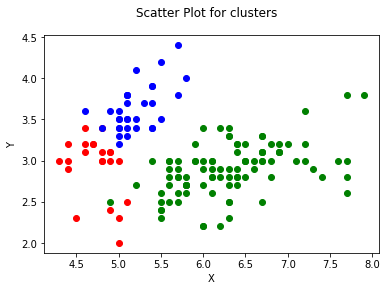

array([2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
Kmeans(X,3)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


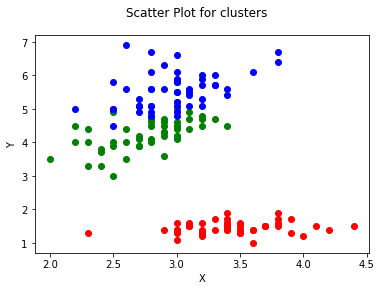

In [6]:
arr = np.unique(y)
color = ['r','g','b','y','c','m','k','w'] 
indices_to_plot = []
fig = plt.figure()
fig.suptitle('Scatter Plot for clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
for x in np.nditer(arr):
    indices_to_plot.append(np.where(y==x))
p=0
    
print(y)
for i in range(0,len(indices_to_plot)):
    for j in np.nditer(indices_to_plot[i]):
        ax.scatter(X[j,1],X[j,2], c= color[p])
    p = p + 1
        
plt.show()

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
data = X
no_of_clusters = 3
rand_data = data.copy()       #As we dont want to distort the data
np.random.shuffle(rand_data)
centroids = rand_data[:no_of_clusters]
    
#first clustering after calculating the eucleadian distance from centroids to each points

In [9]:
data = data[0:10,:]


In [10]:
rand_data = data.copy()       #As we dont want to distort the data
np.random.shuffle(rand_data)
centroids = rand_data[:no_of_clusters]

In [11]:
centroids.shape


(3, 4)

In [12]:
data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [13]:
centroids


array([[4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2]])

In [14]:
centroids[:, np.newaxis]


array([[[4.7, 3.2, 1.3, 0.2]],

       [[4.6, 3.1, 1.5, 0.2]],

       [[4.4, 2.9, 1.4, 0.2]]])

In [15]:
((data-centroids[:, np.newaxis])**2)


array([[[0.16, 0.09, 0.01, 0.  ],
        [0.04, 0.04, 0.01, 0.  ],
        [0.  , 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.04, 0.  ],
        [0.09, 0.16, 0.01, 0.  ],
        [0.49, 0.49, 0.16, 0.04],
        [0.01, 0.04, 0.01, 0.01],
        [0.09, 0.04, 0.04, 0.  ],
        [0.09, 0.09, 0.01, 0.  ],
        [0.04, 0.01, 0.04, 0.01]],

       [[0.25, 0.16, 0.01, 0.  ],
        [0.09, 0.01, 0.01, 0.  ],
        [0.01, 0.01, 0.04, 0.  ],
        [0.  , 0.  , 0.  , 0.  ],
        [0.16, 0.25, 0.01, 0.  ],
        [0.64, 0.64, 0.04, 0.04],
        [0.  , 0.09, 0.01, 0.01],
        [0.16, 0.09, 0.  , 0.  ],
        [0.04, 0.04, 0.01, 0.  ],
        [0.09, 0.  , 0.  , 0.01]],

       [[0.49, 0.36, 0.  , 0.  ],
        [0.25, 0.01, 0.  , 0.  ],
        [0.09, 0.09, 0.01, 0.  ],
        [0.04, 0.04, 0.01, 0.  ],
        [0.36, 0.49, 0.  , 0.  ],
        [1.  , 1.  , 0.09, 0.04],
        [0.04, 0.25, 0.  , 0.01],
        [0.36, 0.25, 0.01, 0.  ],
        [0.  , 0.  , 0.  , 0.  ],
        [0

In [16]:
p= np.sqrt(((data-centroids[:, np.newaxis])**2).sum(axis=2))
p

array([[0.50990195, 0.3       , 0.        , 0.24494897, 0.50990195,
        1.08627805, 0.26457513, 0.41231056, 0.43588989, 0.31622777],
       [0.64807407, 0.33166248, 0.24494897, 0.        , 0.64807407,
        1.16619038, 0.33166248, 0.5       , 0.3       , 0.31622777],
       [0.92195445, 0.50990195, 0.43588989, 0.3       , 0.92195445,
        1.45945195, 0.54772256, 0.78740079, 0.        , 0.55677644]])

In [17]:
clustered_data = np.argmin(p, axis=0)
clustered_data

array([0, 0, 0, 1, 0, 0, 0, 0, 2, 0])

In [18]:
new_centroids = np.array([data[clustered_data==k].mean(axis=0) for k in range(centroids.shape[0])])


In [19]:
new_centroids


array([[4.95  , 3.3875, 1.45  , 0.225 ],
       [4.6   , 3.1   , 1.5   , 0.2   ],
       [4.4   , 2.9   , 1.4   , 0.2   ]])

In [21]:
distances = np.sqrt(((data - new_centroids[:, np.newaxis])**2).sum(axis=2))
distances


array([[0.19565595, 0.39469134, 0.34753597, 0.45637841, 0.22534695,
        0.74718221, 0.3616369 , 0.07603453, 0.73707615, 0.321374  ],
       [0.64807407, 0.33166248, 0.24494897, 0.        , 0.64807407,
        1.16619038, 0.33166248, 0.5       , 0.3       , 0.31622777],
       [0.92195445, 0.50990195, 0.43588989, 0.3       , 0.92195445,
        1.45945195, 0.54772256, 0.78740079, 0.        , 0.55677644]])